Course 1 - 神经网络和深度学习 - 第二周作业 - 具有神经网络思维的Logistic回归

请确保同一级目录下,有lr_utils.py和datasets文件.

tf1.8 \ python3.6

---

我们要做的事是搭建一个能够**【识别猫】** 的简单的神经网络

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

---

In [311]:
train_set_x_orig, train_set_y,test_set_x_orig,test_set_y, classes=load_dataset()

In [312]:
print("x-shape:"+str(train_set_x_orig.shape)+"\ny-shape: "+str(train_set_y.shape))

x-shape:(209, 64, 64, 3)
y-shape: (1, 209)


注上1句: train_set_x_orig的维度为(m_train,num_px,num_px,num_channel)

In [313]:
# 调整输入和标签的形状一致
train_set_y = train_set_y.T
test_set_y = test_set_y.T
print(train_set_y.shape)
print(test_set_y.shape)

(209, 1)
(50, 1)


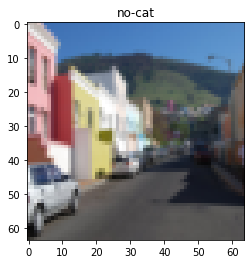

In [314]:
index = 1
plt.title('no-cat' if train_set_y[index,0]==0 else 'cat')
plt.imshow(train_set_x_orig[index])

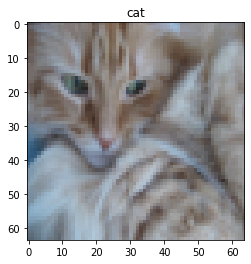

In [315]:
index = 2
plt.title('no-cat' if train_set_y[index,0]==0 else 'cat')
plt.imshow(train_set_x_orig[index])

---

In [316]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1] 
num_channel = 3 

# 1. 使用z = wx+b公式, 这里对X平坦化,即每个行向量是一个张图的信息
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1)

# 同上对测试集x操作
test_set_x_flatten = test_set_x_orig.reshape(m_test,-1)

In [317]:
train_set_x_flatten.shape,test_set_x_flatten.shape

((209, 12288), (50, 12288))

In [318]:
train_set_y.shape,test_set_y.shape

((209, 1), (50, 1))

注上1句 - 数据集上的一行向量就是一张图片的信息

In [319]:
# 2. 标准化 - 针对输入,与标签无关
tmp = train_set_x_flatten
train_set_x = (tmp - np.mean(tmp))/(np.std(tmp))

tmp = test_set_x_flatten
test_set_x = (tmp - np.mean(tmp))/(np.std(tmp))

注上1句 - 如上标准化是通过特征的平均值和标准差，将特征缩放成一个标准的正态分布，缩放后均值为0，方差为1。

归一化和标准化区别:
归一化是为了消除纲量压缩到[0,1]区间；标准化只是调整特征整体的分布

----

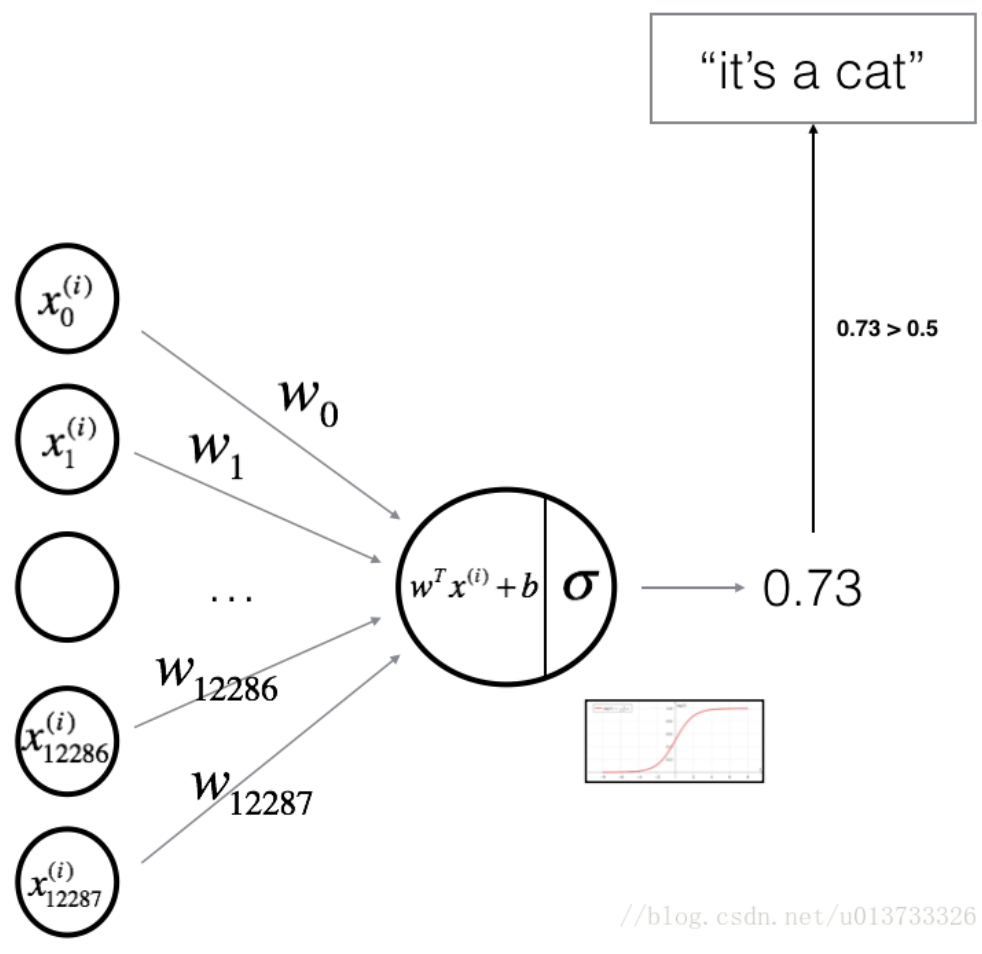

In [320]:
# 3.激活函数
def sigmoid(z):
    
    """
    参数:
        z - 任何大小的标量或numpy数值
    返回:
        s - sigmoid(z)
    """
    
    s = 1 / (1+np.exp(-z))
    return s

In [321]:
# 4. 初始化参数

def initialize(dim):
    """
    参数:
        dim - 样本向量的长度
    返回:
        w - 维度为 (dim,1) 的正太分布的初始化向量
        b - 初始化一个标量
    """
    
    w = np.random.normal(loc=0,scale=0.1,size=(dim,1))
    b = 0
    
    return (w,b)
    

In [322]:
# 模拟正向传播的过程,与反向传播求导的过程
y = train_set_y
x = train_set_x
m = x.shape[0]
w,b = initialize(12288)
z = np.dot(x,w)+b
a = sigmoid(z)
print('a.shape:',a.shape)
print('y.shape:',y.shape)
cost = (-1/m) * np.sum(y*np.log(a)+(1-y)*np.log(1-a))
cost = np.squeeze(cost)# cost
assert(cost.shape == ()) # 验证cost实数
print('cost:',cost)
dz = a-y
print('dz.shape:',dz.shape)
dw = (1/m) * np.matmul(x.T,dz) #x=(m,nx) dz=(m,1) dw=(nx,1)
db = (1/m) * np.sum(dz) 
print('dw:',dw)

a.shape: (209, 1)
y.shape: (209, 1)
cost: 4.446580650161221
dz.shape: (209, 1)
dw: [[ 0.09149661]
 [ 0.16988537]
 [ 0.16667232]
 ...
 [ 0.03818711]
 [ 0.05536235]
 [-0.0043111 ]]


In [323]:
# 4. cost_fn
def cost_fn(m,A,Y):
    cost = (-1/m) * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    cost = np.squeeze(cost) # 样例: 将[3]压缩维度为3
    assert(cost.shape == ())
    return cost

In [324]:
# 4. propagate

def propagate(w,b,X,Y,is_train=True):
    """
    实现前向传播
    
    参数:
        w - 权重矩阵,维度为 (图片大小,1)
        b - 偏置,一个标量 
        X - 输入,维度为 (m,图片大小)
        Y - 标签,维度为 (m,1) 
    
    返回1 - 训练时:
        (grads,A,cost):
            cost - 代价 - 逻辑回归的负对数似然成本
            grads - w,b字典
        
        
    返回2 - 测试时:
        (A,cost)
        
    """
    m = X.shape[0]
    #1 
    Z = np.dot(X,w)+b
    A = sigmoid(Z)
    
    #2
    cost = cost_fn(m,A,Y)
    
    # 3
    if is_train == False:
        return (A,cost)
        
    
    # 3 - 反向
    dz = A-Y
    dw = (1/m) * np.matmul(x.T,dz)
    db = (1/m) * np.sum(dz)
    assert(dw.shape == w.shape)
    assert(db.dtype == np.float)
    
    grads = (dw,db)
    
    return (grads,A,cost)
    

In [325]:
# 如果有bug,在这里测试propagate
w,b = initialize(train_set_x.shape[1])
grads,A,cost = propagate(w,b,train_set_x,train_set_y,True)
print('cost:',cost)
print('grads:',grads)

cost: 4.370531168982638
grads: (array([[ 0.09671679],
       [ 0.1416755 ],
       [ 0.08642385],
       ...,
       [ 0.06528186],
       [ 0.07823835],
       [-0.04316682]]), 0.21501546510791647)


In [326]:
# 6. 优化器
def optimizer(params,grads,lr):
    """
    更新参数
    
    参数:
        params - (w,b) 
        loss_fn - 损失函数 
        lr - 学习率
    返回:
        更新后的params
    """
    # 1
    w,b = params
    dw,db = grads
    
    # 3 
    w = w - lr*dw
    b = b - lr*db
    
    params = (w,b)
    
    return params 
    

In [328]:
# 7. 训练器

def train(X,Y,num_epochs=1000,lr=0.01):  
        
    w,b = initialize(X.shape[1])
    costs = []
    
    for epoch in range(num_epochs):
        
        # 2
        grads,A,cost = propagate(w,b,X,Y,True)
        
        # 3
        w,b = optimizer((w,b),grads,lr)
        
        # 4
        if epoch %100 == 0:
            costs.append(cost)
        # 5
        if epoch % 100 ==0:
            print('迭代的次数:',epoch,'误差值:',cost)
        
        
    params = (w,b)
    
    return (params,A,costs,lr)

In [335]:
# 8 开启训练

params,A,costs,lr = train(train_set_x,train_set_y,1000,0.01)


#打印训练后的准确性
print("训练集准确性："  , format(100 - np.mean(np.abs(A - train_set_y)) * 100) ,"%")

迭代的次数: 0 误差值: 4.068112685311986
迭代的次数: 100 误差值: 0.12118263493123681
迭代的次数: 200 误差值: 0.051401445760242685
迭代的次数: 300 误差值: 0.03261158183393396
迭代的次数: 400 误差值: 0.023836314467644483
迭代的次数: 500 误差值: 0.0188290900428017
迭代的次数: 600 误差值: 0.0156037406674905
迭代的次数: 700 误差值: 0.01335092744582153
迭代的次数: 800 误差值: 0.01168529013287494
迭代的次数: 900 误差值: 0.010401299383473492
训练集准确性： 99.07338835889763 %


Text(0, 0.5, 'cost')

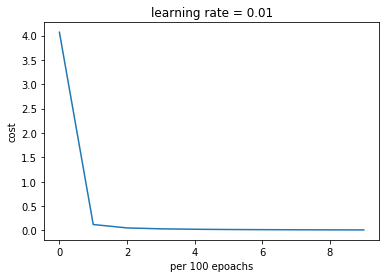

In [336]:
# 9 可视化

costs = np.squeeze(costs)
plt.plot(costs)
plt.title('learning rate = '+str(lr))
plt.xlabel('per 100 epoachs')
plt.ylabel('cost')


In [337]:
# 测试泛化性
w,b = params
A_test,costs_test =  propagate(w,b,test_set_x,test_set_y,is_train=False)


print("测试集准确性："  , format(100 - np.mean(np.abs(A_test - test_set_y)) * 100) ,"%")


测试集准确性： 59.0827568773164 %
